In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

#### DATA IMPORT

In [2]:
df = pd.read_csv('C:\\Users\\gorvi\\rolling_stones_spotify.csv')

In [3]:
df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [4]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1610.0,804.500000,464.911282,0.000000,402.250000,804.50000,1206.75000,1609.000
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304


#### DATA CLEANING

#### Check for Duplicates:-

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
duplicate_rows = df[df.duplicated(subset='id', keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows based on 'id' column:")
    print(duplicate_rows)
else:
    print("No duplicate rows found based on 'id' column.")

No duplicate rows found based on 'id' column.


#### Check for missing values:-

In [9]:
missing_values = df.isnull().sum()
if missing_values.any().any():
    print("\nColumns with missing values:")
    print(missing_values)
else:
    print("\nNo missing values found.")


No missing values found.


#### Check for irrelevant values:-

In [10]:
irrelevant_entries = df[(df['instrumentalness'] < 0) | (df['instrumentalness'] > 1)]  
if not irrelevant_entries.empty:
    print("\nIrrelevant entries:")
    print(irrelevant_entries)
else:
    print("\nNo irrelevant entries found.")


No irrelevant entries found.


#### Identifying Numeric and Categorical columns:-

In [11]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes('object').columns.tolist()

In [12]:
df[numerical_columns].columns

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms'],
      dtype='object')

In [13]:
df[categorical_columns].columns

Index(['name', 'album', 'release_date', 'id', 'uri'], dtype='object')

#### Identifying Outliers:-

##### Using Box plot

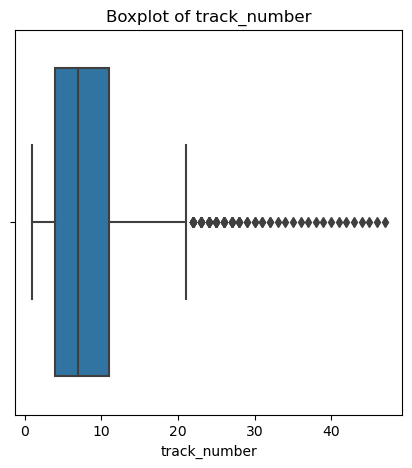

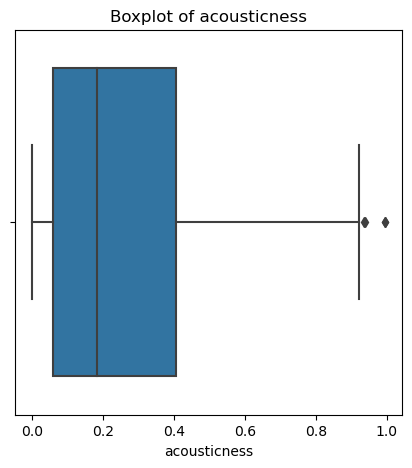

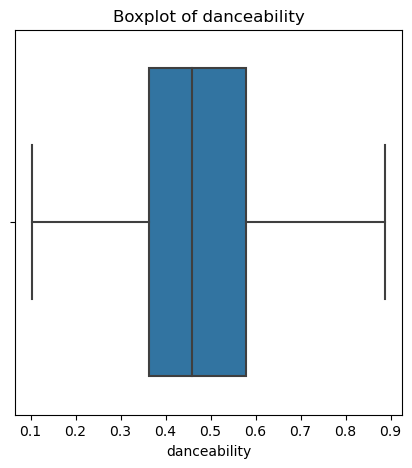

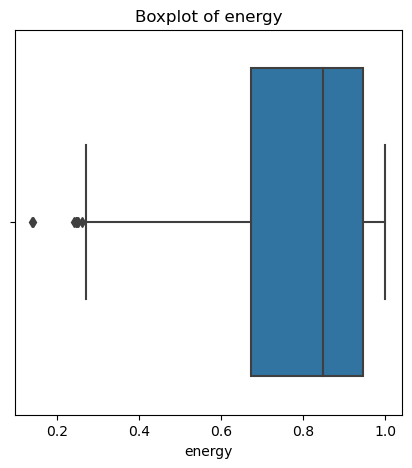

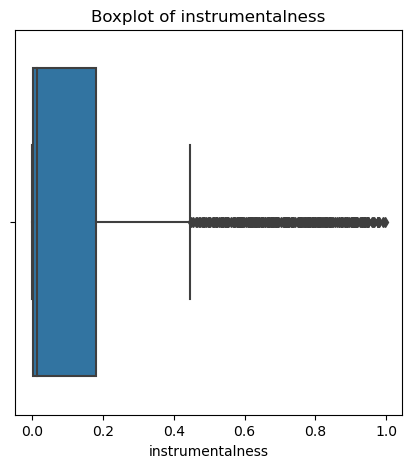

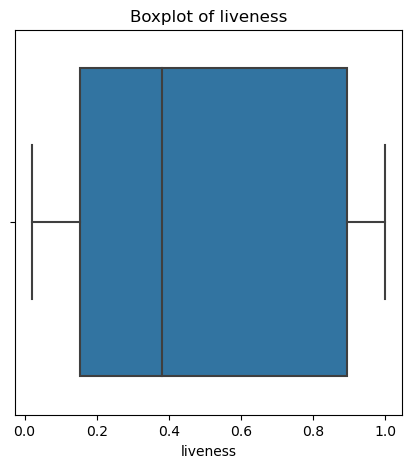

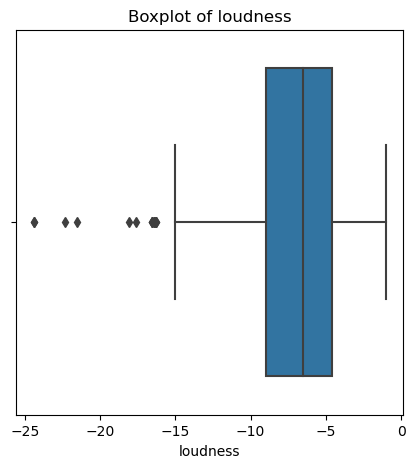

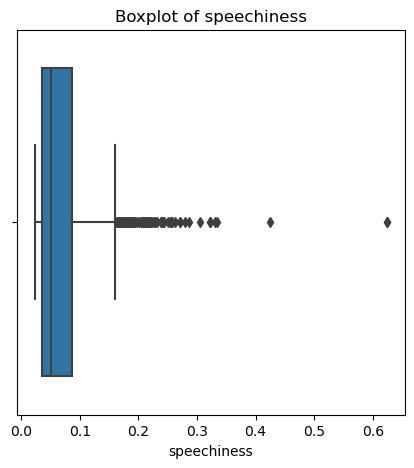

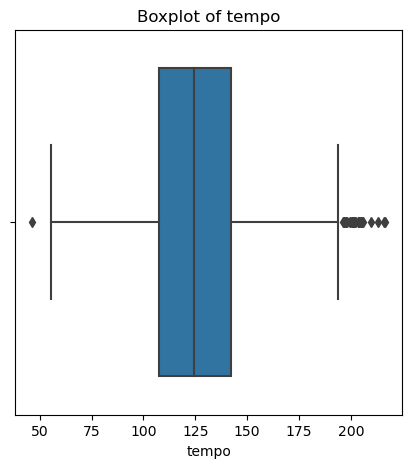

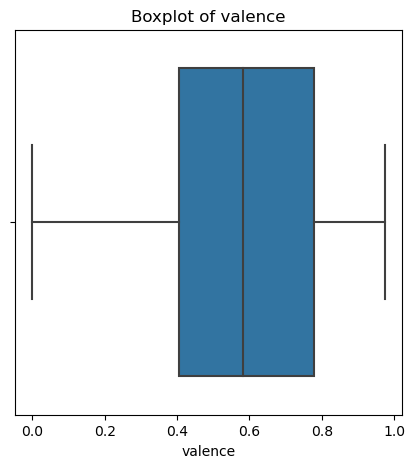

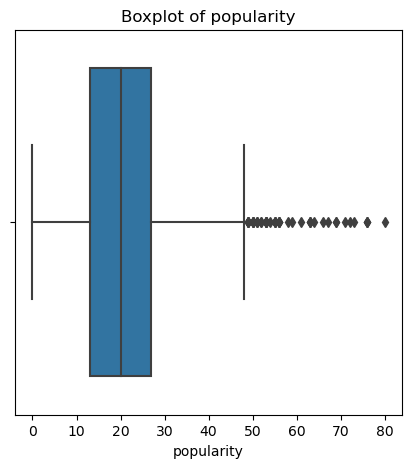

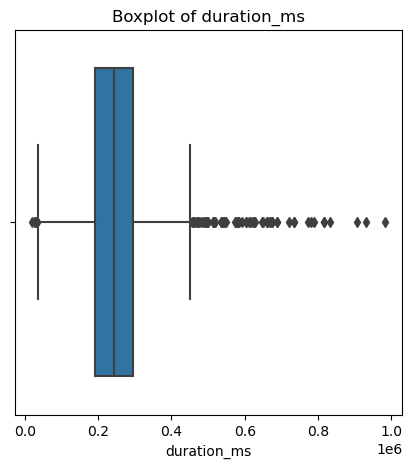

In [14]:
for column in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

#####  Using Z-Score

In [15]:
# Calculate Z-scores

z_scores = np.abs(df[numerical_columns].apply(zscore))

for column in numerical_columns:
    outliers = df[z_scores[column] > 3]
    if not outliers.empty:
        print(f"\nOutliers in {column} based on z-score:")
        print(outliers)
    else:
        print(f"\nNo outliers found in {column} based on z-score.")


Outliers in track_number based on z-score:
                                                  name            album  \
261                                 Hate To See You Go    Honk (Deluxe)   
262                                     Out Of Control    Honk (Deluxe)   
263                              Rock And A Hard Place    Honk (Deluxe)   
264                                              Happy    Honk (Deluxe)   
265                                       Out Of Tears    Honk (Deluxe)   
266                                      Rough Justice    Honk (Deluxe)   
267                                 You Got Me Rocking    Honk (Deluxe)   
268                                        Saint Of Me    Honk (Deluxe)   
269                                      One More Shot    Honk (Deluxe)   
270  Get Off Of My Cloud - Live At Principality Sta...    Honk (Deluxe)   
271  Dancing With Mr. D - Live At The Gelredome, Ar...    Honk (Deluxe)   
272  Beast Of Burden - Live At Arrowhead Stadium, K...  

#### Capping outliers based on Z-Score

In [16]:
# Handle outliers by capping them based on z-scores
for column in df[numerical_columns]:
    mean = df[column].mean()
    std_dev = df[column].std()
    
    # Define the lower and upper bounds
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

print("\nOutliers handled by capping based on z-score.")


Outliers handled by capping based on z-score.


In [17]:
df.to_csv('cleaned_rolling_stones_spotify.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_spotify_rolling_stones.csv'.")

df = pd.read_csv('cleaned_rolling_stones_spotify.csv') 


Cleaned dataset saved as 'cleaned_spotify_rolling_stones.csv'.


#### EXPLORATORY DATA ANALYSIS

#### Popular Albums:-

In [18]:
popular_songs_threshold = 70
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)

In [19]:
top_albums = album_popularity.head(2)
print(f"Top 2 recommended albums based on popular songs:\n{top_albums}")

Top 2 recommended albums based on popular songs:
album
Sticky Fingers (Remastered)    50.920633
Some Girls                     45.613755
Name: popularity, dtype: float64


The above mentioned Top 2 Albums can be recommended to anyone which are based on the number of popular songs in an album

In [20]:
top_albums = album_popularity.head(10)

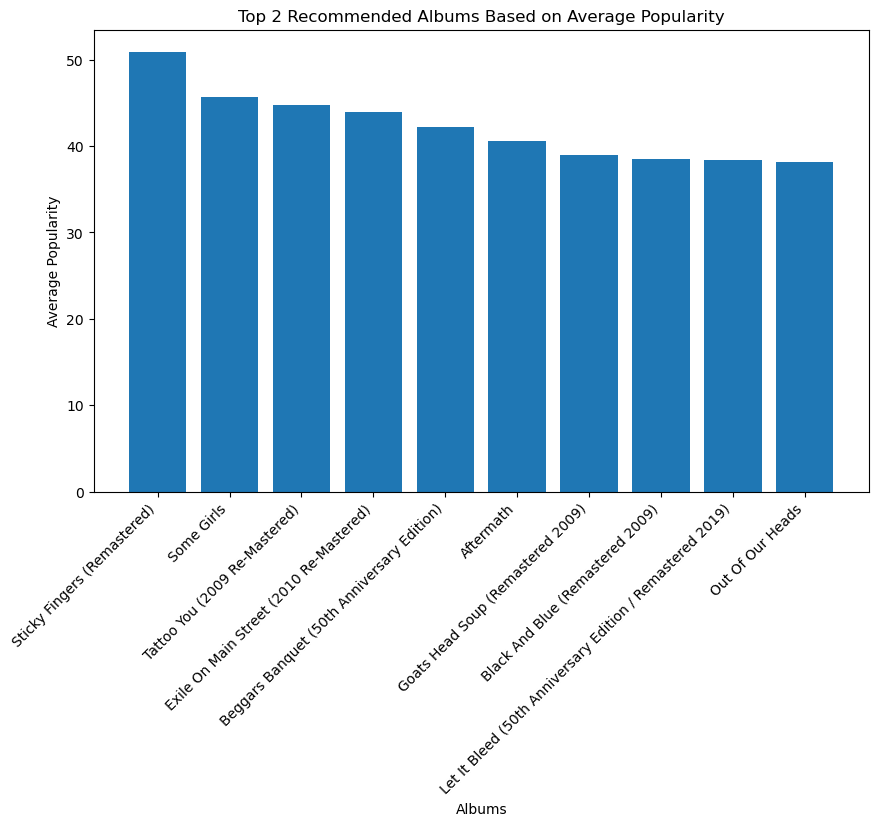

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(top_albums.index, top_albums.values)
plt.xlabel('Albums')
plt.ylabel('Average Popularity')
plt.title('Top 2 Recommended Albums Based on Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Visualizing the Distribution of each Feature:- 

In [48]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

##### Using Histogram Analysis

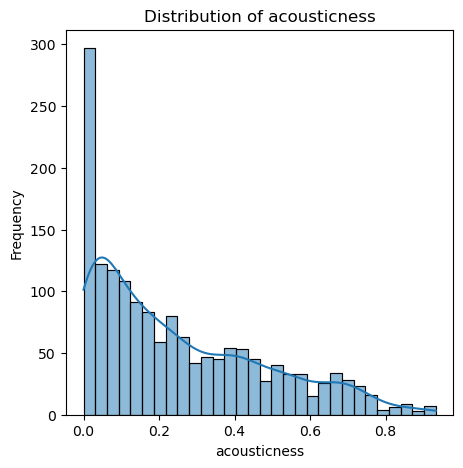

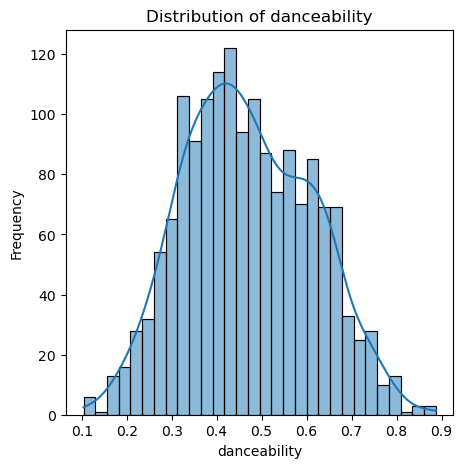

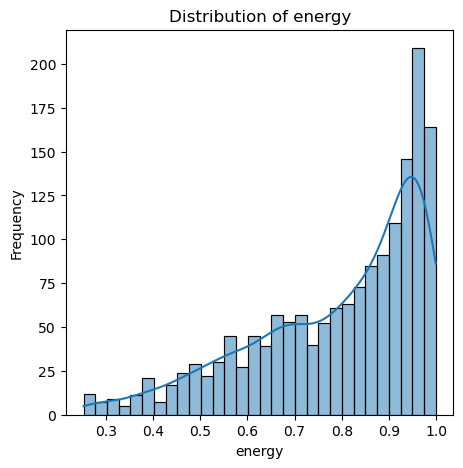

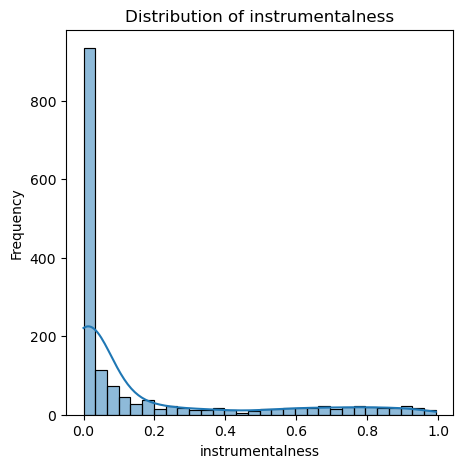

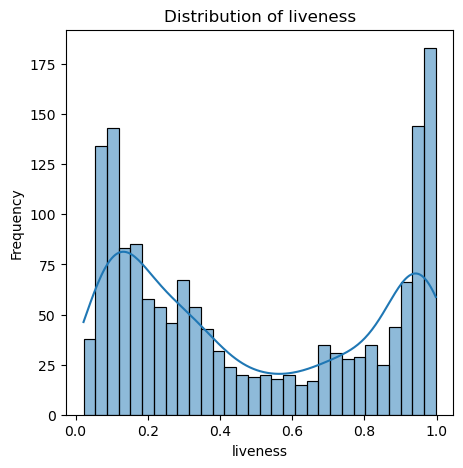

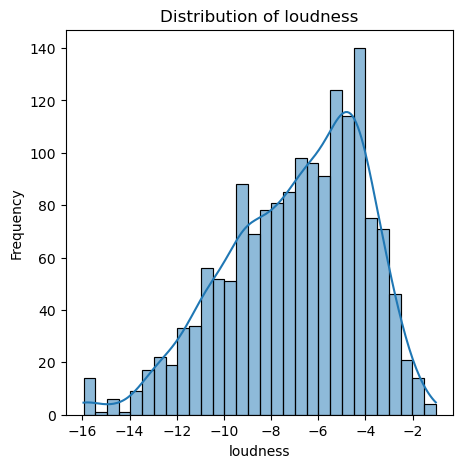

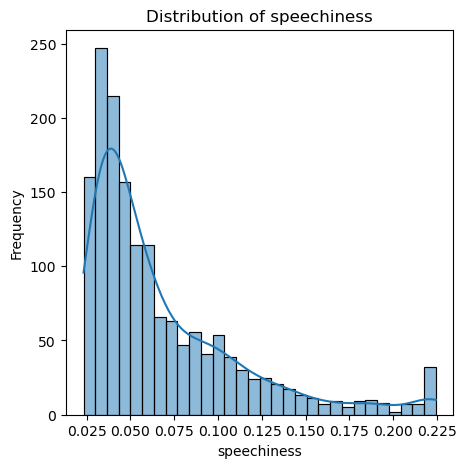

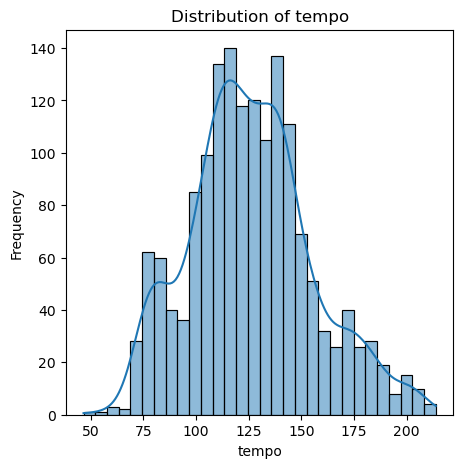

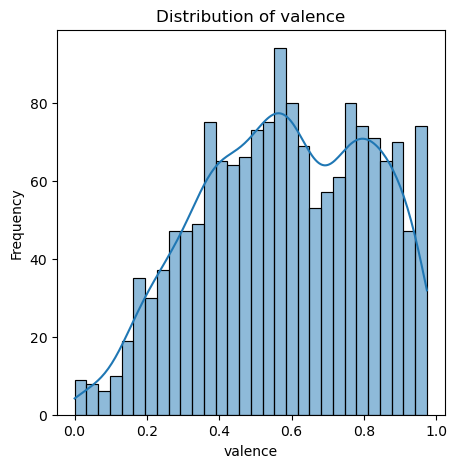

In [22]:
for feature in features:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

##### Using Correlation Analysis

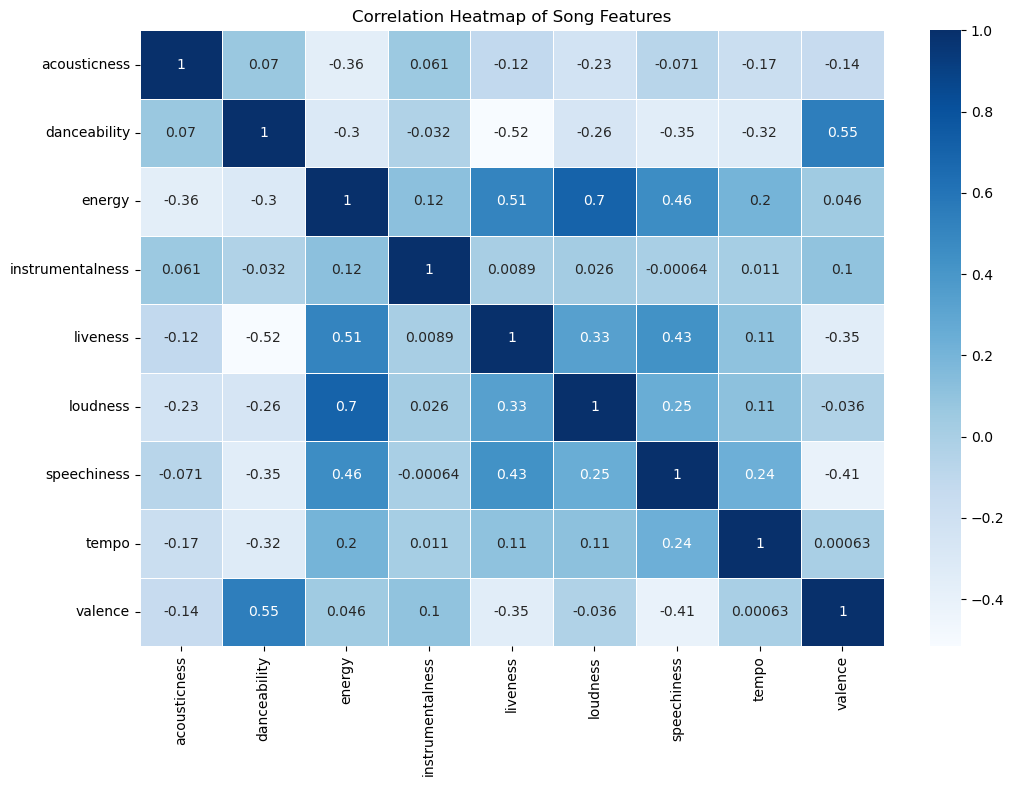

In [44]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap of Song Features')
plt.show()

From above graph we can Interpret that;
  1. Songs with high energy tend to also have high loudness(High positive correlation).
  2. Songs with high acousticness tend to have low energy(High negative correlation).
  3. There is little to no linear relationship between speechiness and valence in the songs.

#### Analyzing Trends Over Time:-

In [50]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

##### Plotting the trends of various features over time.

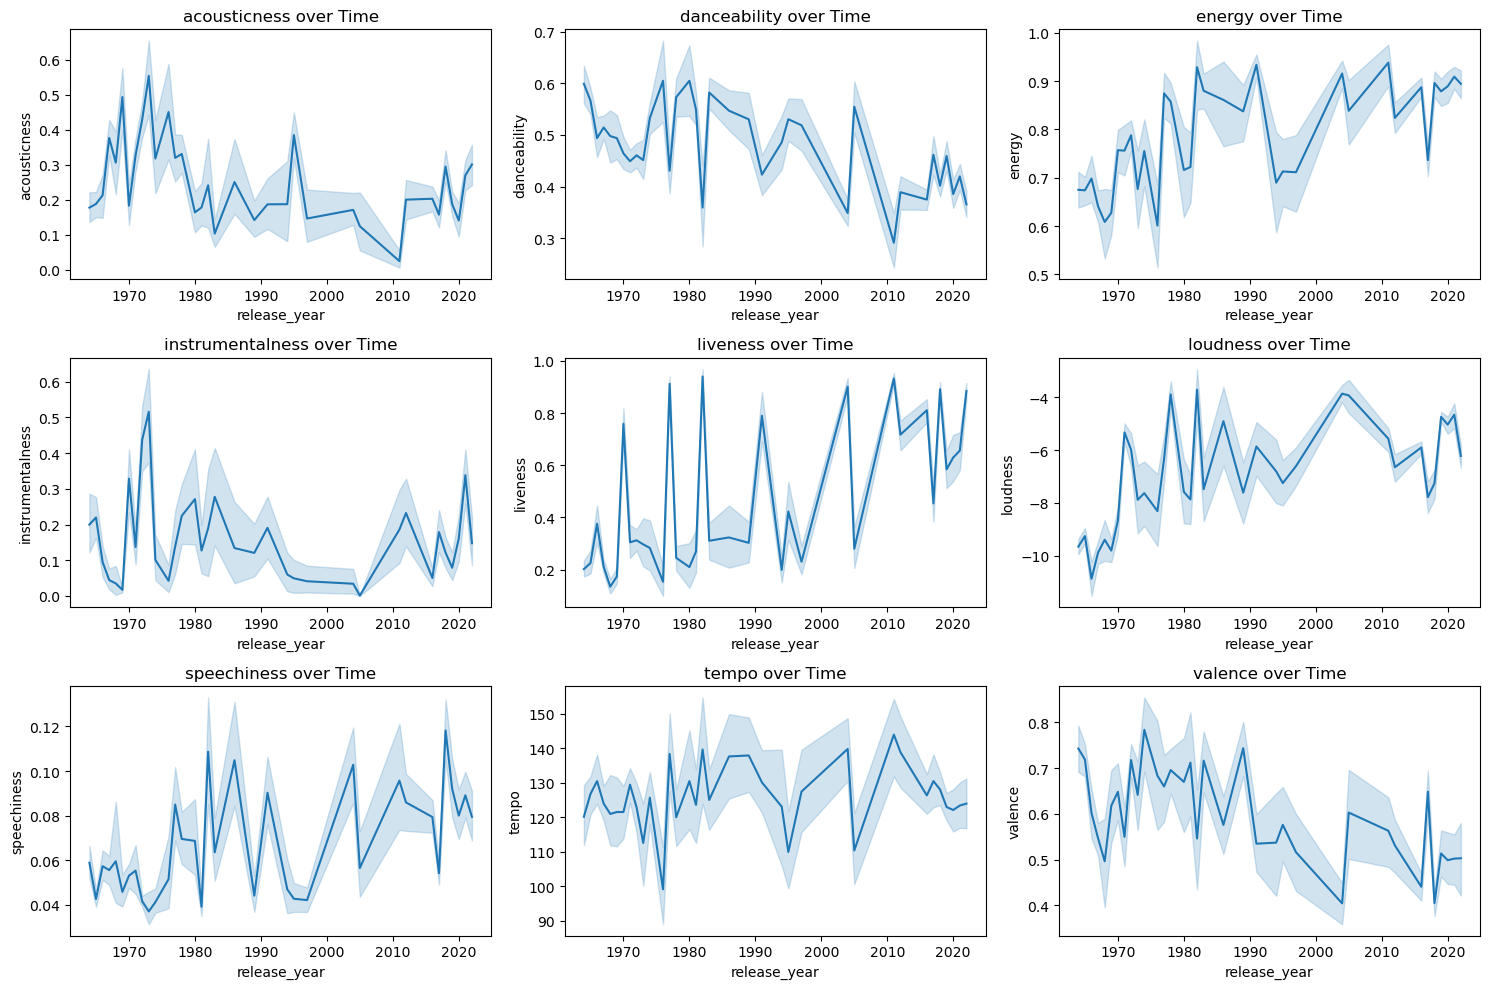

In [43]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.lineplot(data=df, x='release_year', y=feature)
    plt.title(f'{feature} over Time')

plt.tight_layout()
plt.show()

From above graphs we can observe that;
1. Features such as; acoustiveness, danceability, valence are decreasing over time.
2. Features such as; energy, liveness, loudness, speechiness, duration are increasing over time.
3. There is a slight decrease in the instrumentalness feature over time.
4. The tempo feature is increasing very slightly over time.

##### Visualsing how the average popularity of songs has changed over time.

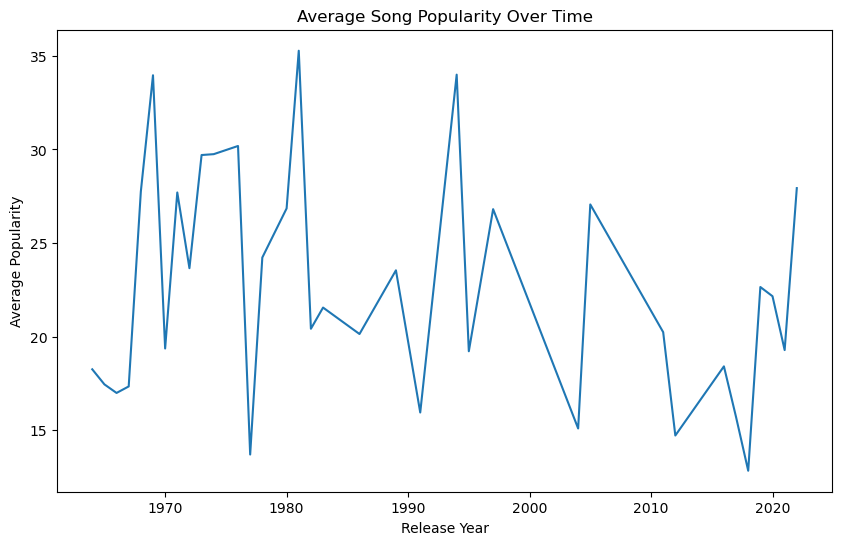

In [54]:
# Calculate the average popularity by year
avg_popularity_by_year = df.groupby('release_year')['popularity'].mean().reset_index()

# Plot the average popularity over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_popularity_by_year, x='release_year', y='popularity')
plt.title('Average Song Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

#### DIMENSIONALITY REDUCTION

In [18]:
ss = StandardScaler()

# Standardize the data
X_std = ss.fit_transform(df[numerical_columns])

In [19]:
#  Create a PCA instance
pca = PCA()

# Fit PCA model to data and transform data to principal components

comp = pca.fit_transform(X_std)

In [20]:
pd.DataFrame(comp, columns=['pc' + str(i) for i in range (12)])

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.598462,0.215397,1.832906,2.285224,2.324144,-1.498469,-1.183489,-1.721031,1.593055,-1.769328,0.771311,1.751497
1,1.647239,0.344700,-0.880276,1.733500,0.522962,-0.536593,-0.408896,-0.014916,-0.846840,-0.628120,0.331741,0.464677
2,1.855776,0.237763,-0.733965,1.760575,1.034388,-0.696796,0.094005,-0.101761,-0.021585,-0.615822,0.413805,0.263116
3,2.697248,1.494769,-0.904857,1.875354,0.045126,-1.269699,1.642396,-0.258012,0.291366,-0.365340,-0.031036,0.282407
4,2.195640,0.957501,-1.042678,1.254843,-0.017469,-0.489954,-0.218405,-0.165964,-0.563467,-0.475124,0.224596,0.571810
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,-0.810487,-1.784520,0.262809,0.955837,-1.105465,1.433424,0.518799,-0.311347,-0.419908,-1.343211,-0.767085,0.694520
1606,-0.320370,0.401986,-0.418839,0.228486,-0.844544,-0.092743,-0.175087,-1.096805,0.969773,-0.925269,0.064481,0.102564
1607,-2.361680,-0.824575,-0.828721,-0.616078,0.046010,-0.656617,1.638613,-0.542548,0.270509,-0.188961,0.020407,0.224920
1608,-2.372795,0.389668,0.127135,-0.481786,-0.362396,-0.487392,0.609043,-1.488235,0.422698,-0.303103,0.603260,-0.146663


In [21]:
# Explained variance by principal components

pca.explained_variance_

array([3.18241211, 1.65732569, 1.28714054, 1.11416007, 1.06349263,
       0.85346103, 0.69750661, 0.68439894, 0.57293013, 0.45095668,
       0.27580833, 0.1678653 ])

In [22]:
# Calculate Explained variance ratio and cumulative explained variance

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [23]:
cumulative_explained_variance 

array([0.26503629, 0.40306098, 0.51025607, 0.60304507, 0.69161441,
       0.76269199, 0.82078144, 0.87777926, 0.92549378, 0.96305016,
       0.98601991, 1.        ])

In [24]:
((pca.explained_variance_ratio_)*100).cumsum()

array([ 26.50362878,  40.30609788,  51.02560683,  60.3045072 ,
        69.16144115,  76.26919886,  82.07814366,  87.77792574,
        92.54937801,  96.3050162 ,  98.60199133, 100.        ])

In [25]:
pca_a = PCA(n_components = 9)

In [26]:
comp_a = pca_a.fit_transform(X_std)

In [27]:
comp_a.shape

(1610, 9)

###### Visual Representation

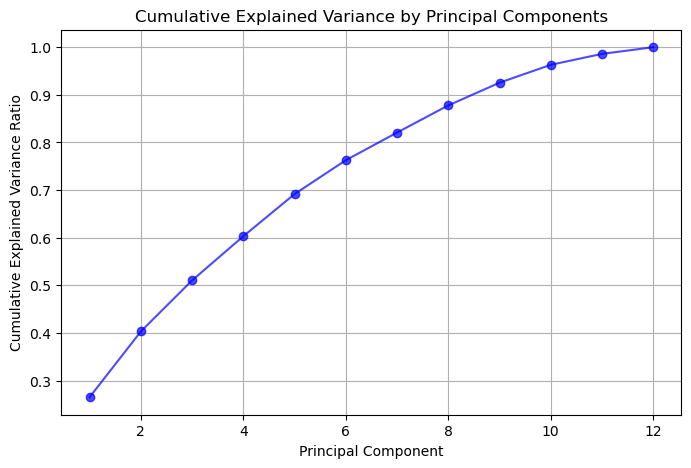

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

We are able to achieve 92% of variance using 9 components instead of 12 components.

#### CLUSTER ANALYSIS

In [57]:
# Picking Number of clusters 

Errors = []

for i in range(1, len(numerical_columns)):

    kmeans= KMeans(n_clusters= i)
    kmeans.fit(comp)
    Errors.append(kmeans.inertia_)

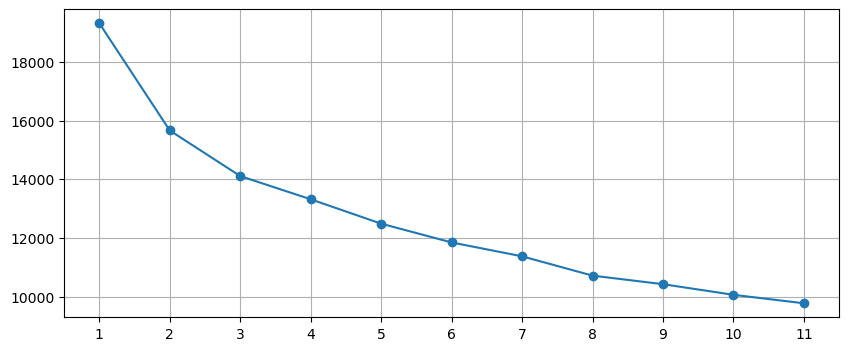

In [58]:
plt.figure(figsize=(10,4))
plt.plot(range(1, len(numerical_columns)), Errors, marker = 'o')
plt.xticks(range(1, len(numerical_columns)))
plt.grid(True)
plt.show()

The chart creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

A lower inertia value indicates better clustering. As per this visual, 3 clusters should be the optimal value

In [59]:
#Kmeans Clustering Algorithm

kmeans= KMeans(n_clusters= 3)

kmeans.fit(comp)

df['cluster_labels'] = kmeans.predict(comp)

In [60]:
df.head(2)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster_membership,cluster_labels
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1.0,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.992916,0.932,-12.913,0.1100,118.001,0.0302,33.0,48640.0,2,1
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2.0,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34.0,253173.0,2,1


In [61]:
# Cluster Center
cluster_centers = kmeans.cluster_centers_

In [62]:
# Transform cluster centers back to original feature space
cluster_centers_original = pca.inverse_transform(cluster_centers)

In [63]:
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=numerical_columns)

In [64]:
cluster_centers_df 

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,-0.219924,-0.308485,0.596378,0.230739,0.264148,-0.485816,0.194208,-0.409280,-0.111819,0.847595,0.221552,-0.313742
1,0.327796,-0.253632,-0.777742,0.720553,-0.066127,0.959975,0.528569,0.792887,0.384652,-0.594954,-0.260674,0.456962
2,-0.141819,0.735744,0.238947,-1.245781,-0.258836,-0.622293,-0.946483,-0.503489,-0.357694,-0.329083,0.051752,-0.188338


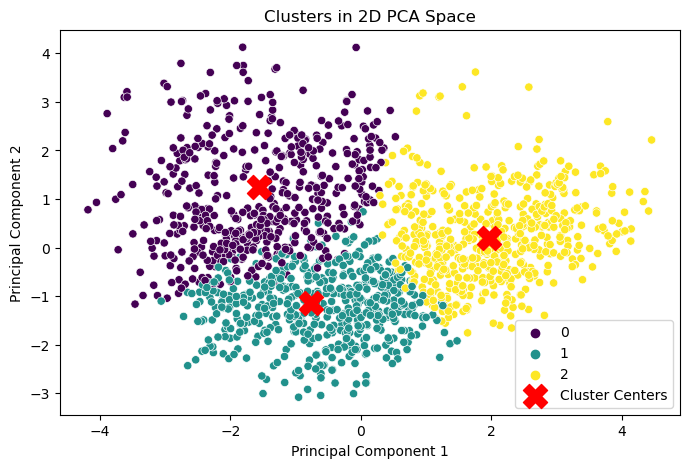

In [65]:
# Visualize the clusters on the 2 principal components

plt.figure(figsize=(8, 5))
sns.scatterplot(x=comp[:, 0], y=comp[:, 1], hue=df['cluster_membership'], palette='viridis', legend='full')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Based on this clustering, we can choose the following cohorts of songs for automatic cohort creation:    

Cohort 0 : It represents songs that are high in danceability, energy, valence, and popularity, while being low in acousticness, instrumentalness, liveness, and speechiness. These characteristics suggest a cluster of lively, energetic, and possibly mainstream or upbeat music tracks.

Cohort 1 : It represents songs that are characterized by high liveness, significant speech or vocal content, high energy and loudness, moderate tempo and duration, and lower danceability and positive emotional content.

Cohort 2 : It represents songs that are characterized by high acousticness, low energy and loudness, less instrumental and live performance, lower speech content, slower tempo, and shorter durations.